## Imports

In [1]:
!ls /kaggle/input/drowsiness-detection

closed_eye  open_eye


In [1]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense


ModuleNotFoundError: No module named 'keras.applications.resnet50'

In [ ]:
!pip uninstall Keras
!pip install Keras==2.3.1

!pip uninstall Keras-Applications
!pip install Keras-Applications==1.0.8

!pip uninstall Keras-Preprocessing
!pip install Keras-Preprocessing==1.1.0


In [3]:
data_dir = '/kaggle/input/drowsiness-detection'

- We do not explicitly label the images 
-  ImageGenerator will read images from subdirectories, and automatically label them from the name of that subdirectory

## Image Data Generator and Data Augmentation

- Things like rotating and flipping the existing images allows you to generate training data that is more varied, and can help the model generalize better 

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   preprocessing_function=preprocess_input) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(224,224),
                                                     batch_size=100,
                                                     shuffle=True,
                                                     class_mode='binary',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.3,
                                        preprocessing_function=preprocess_input)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(224,224),
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                subset='validation')   

Found 33600 images belonging to 2 classes.
Found 14400 images belonging to 2 classes.


In [10]:
model_res50 = Sequential()

model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_res50.add(Dense(1, activation='sigmoid'))

model_res50.layers[0].trainable = False 

model_res50.summary()


steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model_res50.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model_res50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=7,
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/7
336/336 [==============================] - 219s 646ms/step - loss: 0.1882 - accuracy: 0.9345 - val_loss: 0.1627 - val_accuracy: 0.9366
Epoch 2/7
336/336 [==============================] - 150s 446ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.1759 - val_accuracy: 0.9382
Epoch 3/7
336/336 [==============================] - 145s 433ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.1739 - val_accuracy: 0.9403
Epoch 4/7
336/336 [==============================] - 152s 452ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.1929 - val_accuracy: 0.9378
Epoch 5/7
336/336 [==============================] - 157s 466ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.2086 - val_accuracy: 0.9368
Epoch 6/7
336/336 [==============================] - 143s 427ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.1919 - val_accuracy: 0.9402
Epoch 7/7
336/336 [==============================] - 144s 429ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.2212 - val_ac

- Let's see some images 


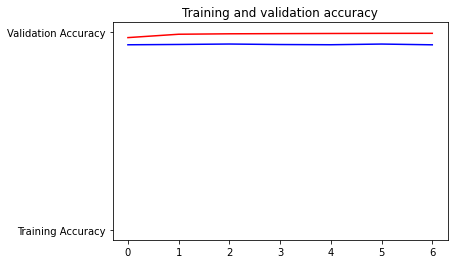

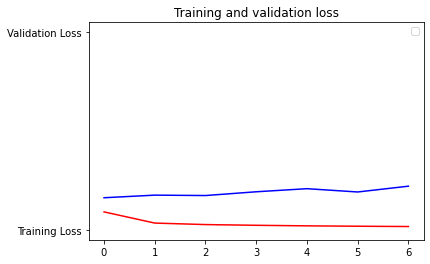

In [12]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model_res50.save('drowsines_model_ResNet50_Binary2.h5')

## Prediction

In [ ]:
img_array = cv2.imread('prediction\s0030_01108_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (image_size, image_size))
X_input = np.array(new_array).reshape(1, image_size, image_size, 3)
# plt.imshow(new_array)
prediction = model.predict(X_input/255.0)
prediction[0]